In [1]:
import math
import collections

import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
pd.options.display.max_rows = 16
uscovid = pd.read_csv('us-counties.csv', dtype={'state': str,'fips': float, 'cases': float})
uscovid.fillna(0)
uscovid = uscovid.drop(["fips", "deaths"], axis=1)
uscovid = uscovid.groupby(['date'],as_index=False).agg({'cases': 'sum'})

In [3]:
ar1 = uscovid.set_index(['date']).shift(1)
uscovid = uscovid.set_index('date')
ar = pd.concat([uscovid, ar1],axis=1)

ar2 = uscovid.set_index(uscovid.index).shift(2)
ar = pd.concat([ar, ar2],axis=1)

for i in range (3, 14):
    ar1 = uscovid.set_index(uscovid.index).shift(i)
    ar = pd.concat([ar, ar1],axis=1)
    

cols = ['y']

for i in range(1, 14):
    j = str(i)
    cols.append('y-' + j)
    
ar.columns = cols


print(ar)

                     y         y-1         y-2         y-3         y-4  \
date                                                                     
2020-01-21         1.0         NaN         NaN         NaN         NaN   
2020-01-22         1.0         1.0         NaN         NaN         NaN   
2020-01-23         1.0         1.0         1.0         NaN         NaN   
2020-01-24         2.0         1.0         1.0         1.0         NaN   
2020-01-25         3.0         2.0         1.0         1.0         1.0   
...                ...         ...         ...         ...         ...   
2021-03-02  28737407.0  28679618.0  28622946.0  28572021.0  28509327.0   
2021-03-03  28804121.0  28737407.0  28679618.0  28622946.0  28572021.0   
2021-03-04  28871536.0  28804121.0  28737407.0  28679618.0  28622946.0   
2021-03-05  28937218.0  28871536.0  28804121.0  28737407.0  28679618.0   
2021-03-06  28993824.0  28937218.0  28871536.0  28804121.0  28737407.0   

                   y-5         y-6   

In [4]:
ar['ma2'] = ar[['y-1', 'y-2']].mean(axis=1)
ar['ma2']

date
2020-01-21           NaN
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           1.0
2020-01-25           1.5
                 ...    
2021-03-02    28651282.0
2021-03-03    28708512.5
2021-03-04    28770764.0
2021-03-05    28837828.5
2021-03-06    28904377.0
Name: ma2, Length: 411, dtype: float64

In [5]:
ar['ma5'] = ar[['y-1', 'y-2', 'y-3', 'y-4', 'y-5']].mean(axis=1)
ar['ma5']

date
2020-01-21            NaN
2020-01-22           1.00
2020-01-23           1.00
2020-01-24           1.00
2020-01-25           1.25
                 ...     
2021-03-02    28562995.40
2021-03-03    28624263.80
2021-03-04    28683222.60
2021-03-05    28743125.60
2021-03-06    28805980.00
Name: ma5, Length: 411, dtype: float64

In [7]:
ar = ar.fillna(0)
ar

,y,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,y-10,y-11,y-12,y-13,ma2,ma5
date,,,,,,,,,,,,,,,,
2020-01-21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-22,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-23,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-24,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-25,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,27944914.0,27873040.0,28651282.0,28562995.40
2021-03-03,28804121.0,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,27944914.0,28708512.5,28624263.80
2021-03-04,28871536.0,28804121.0,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,28770764.0,28683222.60


In [8]:
X = ar.drop('y', axis=1)
y = ar['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(328, 15)
(83, 15)
(328,)
(83,)


In [9]:
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPRegressor 

scaler = StandardScaler() 
scaler.fit(X_train)
X_train_trans = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)  
X_test_trans = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)  

#model tunned by Professor Hall 
#model = MLPRegressor(solver='lbfgs', alpha=1e-5, max_iter=3000,
#                     hidden_layer_sizes=(5, 2), random_state=12345)

#model tunned using GridSearchCV
model = MLPRegressor(solver='lbfgs', alpha=0.0005, activation='identity',
                     max_iter=4000, hidden_layer_sizes=(1, 2), random_state=12345)

model.fit(X_train_trans, y_train)

MLPRegressor(activation='identity', alpha=0.0005, hidden_layer_sizes=(1, 2),
             max_iter=4000, random_state=12345, solver='lbfgs')

In [10]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV


param_list = {"hidden_layer_sizes": [(1,),(50,)],
              "activation": ["identity", "logistic", "relu"],
              "alpha": [0.00005,0.0005]}

gridCV = GridSearchCV(estimator=model, param_grid=param_list)

In [11]:
gridCV.fit(X_train_trans, y_train)

GridSearchCV(estimator=MLPRegressor(activation='identity', alpha=0.0005,
                                    hidden_layer_sizes=(1, 2), max_iter=4000,
                                    random_state=12345, solver='lbfgs'),
             param_grid={'activation': ['identity', 'logistic', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [(1,), (50,)]})

In [12]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
report(gridCV.cv_results_)

Model with rank: 1
Mean validation score: 0.998 (std: 0.003)
Parameters: {'activation': 'identity', 'alpha': 0.0005, 'hidden_layer_sizes': (1,)}

Model with rank: 2
Mean validation score: 0.998 (std: 0.003)
Parameters: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,)}

Model with rank: 3
Mean validation score: 0.998 (std: 0.003)
Parameters: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (50,)}



In [13]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test_trans)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 23520.04 degrees.
Accuracy: 99.9 %.


In [25]:
#training predictions
Trpredictions = model.predict(X_train_trans)

Trpredictions

array([6.47346504e+01, 6.63181862e+01, 6.60690295e+01, 6.59628423e+01,
       6.71217261e+01, 6.81792079e+01, 7.10412750e+01, 7.11387976e+01,
       7.00436100e+01, 6.95313378e+01, 7.13783791e+01, 7.33849254e+01,
       7.42649425e+01, 7.66855689e+01, 7.58431201e+01, 7.61520283e+01,
       7.79233320e+01, 7.72826986e+01, 7.77638488e+01, 7.80052867e+01,
       7.61354105e+01, 7.69766476e+01, 7.81620862e+01, 7.93721778e+01,
       7.98864574e+01, 7.99231737e+01, 8.02590572e+01, 8.01855859e+01,
       9.28893521e+01, 9.30084876e+01, 9.21361316e+01, 9.26291893e+01,
       9.41696977e+01, 9.79802617e+01, 1.01231939e+02, 1.11660939e+02,
       1.10249235e+02, 1.32758496e+02, 1.32484202e+02, 1.31239401e+02,
       1.39572466e+02, 1.66038207e+02, 1.84562598e+02, 2.07481588e+02,
       2.44739588e+02, 3.24697160e+02, 4.30367428e+02, 5.77256707e+02,
       7.07186942e+02, 9.38962091e+02, 1.26742440e+03, 1.55601885e+03,
       2.03066768e+03, 2.67235444e+03, 3.45384639e+03, 4.28844997e+03,
      

In [14]:
#testing predictions
predictions = model.predict(X_test_trans)

predictions

array([16584823.86782937, 16798585.9582557 , 16982277.84942437,
       17257026.88109813, 17527559.40091399, 17737669.67333215,
       17885982.66911785, 18070878.90335755, 18298241.74785549,
       18511970.09370573, 18757710.04034072, 18932722.00974038,
       18957052.05179457, 19172428.77195079, 19343884.29096808,
       19568901.18211138, 19790557.41652729, 19977397.41374236,
       20193676.32845771, 20377288.58285498, 20702427.84422443,
       20888030.38450143, 21169551.05078594, 21439833.96854481,
       21645546.66544334, 21926463.03599181, 22294068.88869984,
       22538207.4537148 , 22703080.80834047, 22908692.01763056,
       23153114.47913369, 23398384.31947769, 23651640.44768513,
       23841796.33477759, 24000783.07315744, 24175815.18920374,
       24320133.67926852, 24501103.00673746, 24700340.99306862,
       24898671.30172836, 25065811.31293634, 25194405.91546348,
       25313758.91132343, 25504105.03755193, 25667819.71341723,
       25820171.37096591, 25984925.99805

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

TrMAE = "{:,.0f}".format(mean_absolute_error(y_train, Trpredictions))
TrRMSE = "{:,.0f}".format(np.sqrt(mean_squared_error(y_train, Trpredictions)))
TrR2 = "{:.2%}".format(r2_score(y_train, Trpredictions))

print("Training MAE:", TrMAE)
print("Training RMSE:", TrRMSE)
print("Training R2:", TrR2)
print("")

MAE = "{:,.0f}".format(mean_absolute_error(y_test, predictions))
RMSE = "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, predictions)))
R2 = "{:.2%}".format(r2_score(y_test, predictions))

print("Testing MAE:", MAE)
print("Testing RMSE:", RMSE)
print("Testing R2:", R2)

Training MAE: 4,255
Training RMSE: 8,976
Training R2: 100.00%

Testing MAE: 23,520
Testing RMSE: 31,088
Testing R2: 99.99%


In [16]:
pd.options.display.float_format = '{:,.0f}'.format
plot = pd.DataFrame(y_test)
plot['yhat'] = predictions
plot

,y,yhat
date,,
2020-12-14,"16,570,615","16,584,824"
2020-12-15,"16,773,586","16,798,586"
2020-12-16,"17,018,628","16,982,278"
2020-12-17,"17,257,055","17,257,027"
2020-12-18,"17,508,278","17,527,559"
...,...,...
2021-03-02,"28,737,407","28,760,993"
2021-03-03,"28,804,121","28,819,582"
2021-03-04,"28,871,536","28,888,638"


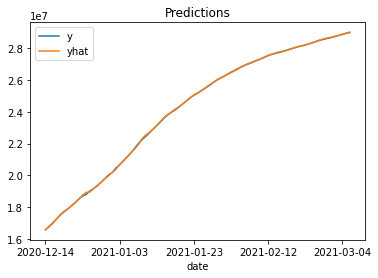

In [17]:
_ = plot.plot(kind='line', title = "Predictions")

In [18]:
import shap

shap.initjs()

In [19]:
model.score(X_test_trans,y_test)

0.9999344508423246

In [20]:
X_train_summary = shap.kmeans(X_train_trans, 20)

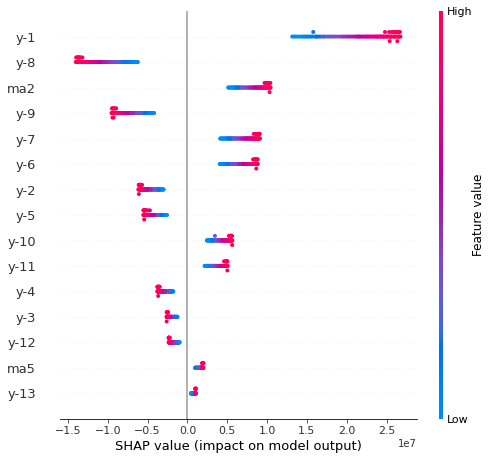

In [21]:
explainer = shap.KernelExplainer(model.predict, X_train_summary)
shap_values = explainer.shap_values(X_test_trans)
shap.summary_plot(shap_values, X_test_trans)

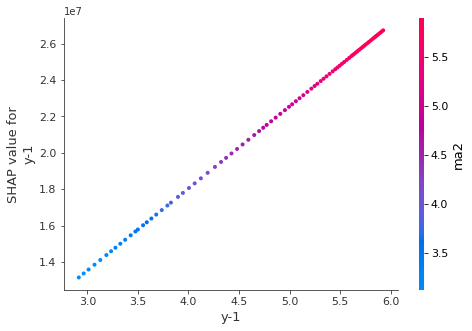

In [22]:
shap.dependence_plot("y-1", shap_values, X_test_trans)

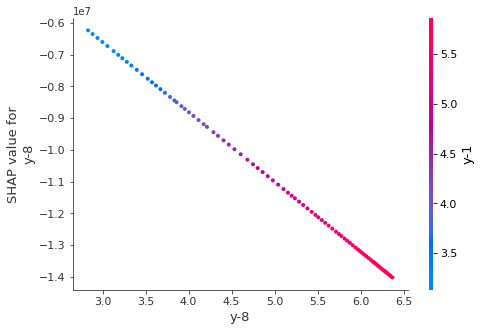

In [23]:
shap.dependence_plot("y-8", shap_values, X_test_trans)

In [24]:
shap.force_plot(explainer.expected_value, shap_values, X_test_trans)